<b>Prepared by: </b>CTRL + Z Zone

| No. | Name                                        | ID                    | Program                   |
|-----|---------------------------------------------|-----------------------|---------------------------|
| 1   |     Mohd Nazeem Bin Mohamad Salim           |     18000927          |     Information System    |
| 2   |     Danish Hisyam                           |     18001136          |     Computer Science      |
| 3   |     Ahvinraaj A/L Thetchinamoorthy          |     17009199          |     Computer Science      |
| 4   |     Ilyas Bin Johari                        |     18000842          |     Computer Science      |

Overview
----------------------------------------------------------------
1. Import Dataset
2. Dataset Exploration
3. Data Cleaning
4. Model Training & Evaluation


<br>
<br>
<br>

# <u><b>IMPORT DATASET</b></u>

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)


raw_data = pd.read_excel('./raw.xlsx')

raw_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Yes
1,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,No,Yes
2,No,No,No,No,No,No,Yes,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No
3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes
4,No,No,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No


# <u><b>DATASET EXPLORATION</b></u>

> General description of dataset.

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [7]:
raw_data.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,3,4,3,2,3,3,3,4,2,2,3,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2907,2846,2771,2820,2883,2982,2723,2924,2820,3169,5434,5434,4383


Some interesting properties can be gleamed from `info` and `describe`, and will be investigated further.

> Check for missing data.

In [8]:
print('Missing data counts:')
raw_data.isna().sum()

Missing data counts:


Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

Output suggests no missing data.

> List down unique values by column.

In [9]:
for col in raw_data.columns:
    print(f'{col}: {pd.unique(raw_data[col])}')

Breathing Problem: ['No' 'Yes']
Fever: ['Yes' 'No']
Dry Cough: ['Yes' 'No']
Sore throat: ['Yes' 'No']
Running Nose: ['Yes' 'No']
Asthma: ['Yes' 'No']
Chronic Lung Disease: ['Yes' 'No']
Headache: ['No' 'Yes' 'NOT']
Heart Disease: ['Yes' 'No' 0 1]
Diabetes: ['Yes' 'No' 'YE']
Hyper Tension: ['Yes' 'No']
Fatigue : ['No' 'Yes' 'YE']
Gastrointestinal : ['Yes' 'No' 'YE']
Abroad travel: ['No' 'Yes' 'NOT']
Contact with COVID Patient: ['No' 'Yes' 1 'NOT']
Attended Large Gathering: ['No' 'Yes']
Visited Public Exposed Places: ['No' 'Yes']
Family working in Public Exposed Places: ['No' 'Yes' 0]
Wearing Masks: ['No']
Sanitization from Market: ['No']
COVID-19: ['Yes' 'No']


Output suggests all columns are binary categories, and are mostly `string` with a few small exceptions.<br>
* The following columns contain some dirty values: <br>
 `Headache`, `Heart Disease`, `Diabetes`, `Fatigue`, `Gastrointestinal`, `Abroad travel`, `Contact with COVID Patient`, `Family working in Public Exposed Places`
* The following columns have only one value: <br>
`Wearing Masks`, `Sanitization from Market`

# <u><b>DATA CLEANING</b></u>

### _Data Encoding_

With the dataset generally understood, the next step is to perform encoding: in this case, binary encoding will suffice. The dataset will be converted into a purely numerical form, with the following encoding scheme. <br>
`"No", "NOT", "0" → 0` <br>
`"Yes", "YE", "1" → 1` <br>

Additionally, column names will be shortened for simpler reference.


> Begin encoding process.

In [10]:
import numpy as np

new_colnames = ['b_problem','fever','d_cough','s_throat','r_nose','asthma','l_disease','headache','h_disease','diabetes','h_tension','fatigue','g_intes','a_travel','p_contact','l_gather','e_places_v','e_places_f', 'w_masks', 's_market', 'target']
encoded = pd.DataFrame(columns=new_colnames)

# for every column in columns of old dataframe
for k, original_colname in enumerate(raw_data.columns):
    # if old data contains a "Y" or "1", enter 1 into new dataframe. else, enter 0
    encoded[new_colnames[k]] = np.where(raw_data[original_colname].str.startswith(("Y", "1")), 1, 0)

> Check for anomalies in new `encoded` dataframe.

In [11]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   b_problem   5434 non-null   int32
 1   fever       5434 non-null   int32
 2   d_cough     5434 non-null   int32
 3   s_throat    5434 non-null   int32
 4   r_nose      5434 non-null   int32
 5   asthma      5434 non-null   int32
 6   l_disease   5434 non-null   int32
 7   headache    5434 non-null   int32
 8   h_disease   5434 non-null   int32
 9   diabetes    5434 non-null   int32
 10  h_tension   5434 non-null   int32
 11  fatigue     5434 non-null   int32
 12  g_intes     5434 non-null   int32
 13  a_travel    5434 non-null   int32
 14  p_contact   5434 non-null   int32
 15  l_gather    5434 non-null   int32
 16  e_places_v  5434 non-null   int32
 17  e_places_f  5434 non-null   int32
 18  w_masks     5434 non-null   int32
 19  s_market    5434 non-null   int32
 20  target      5434 non-null   in

In [12]:
encoded.describe()[:3]

,b_problem,fever,d_cough,s_throat,r_nose,asthma,l_disease,headache,h_disease,diabetes,h_tension,fatigue,g_intes,a_travel,p_contact,l_gather,e_places_v,e_places_f,w_masks,s_market,target
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.465035,0.476261,0.490063,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416820,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498822,0.499482,0.499947,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.493078,0.0,0.0,0.395009


In [13]:
encoded.head()

,b_problem,fever,d_cough,s_throat,r_nose,asthma,l_disease,headache,h_disease,diabetes,h_tension,fatigue,g_intes,a_travel,p_contact,l_gather,e_places_v,e_places_f,w_masks,s_market,target
0,0,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1
1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0,0,1
2,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0,0,0,1
4,0,0,0,0,1,1,1,0,1,0,1,1,0,0,1,1,1,1,0,0,0


No apparent anomalies caused by the encoding process are found.

### _Feature Selection_

At this point, the data is clean enough to be worked on. However, to further understand it, each column will be plotted to understand the distribution of data: particularly skewness, variance, standard deviation, etc.

> Plot counts of each column's observation to study distribution.

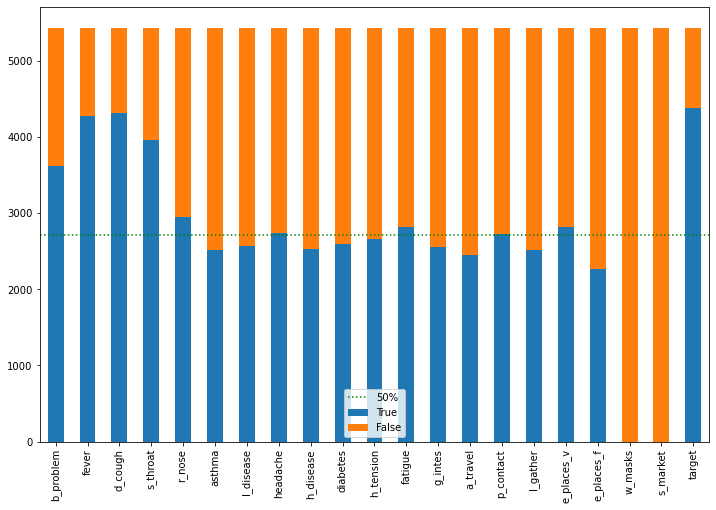

In [14]:
import matplotlib.pyplot as plt

counts = pd.DataFrame(columns=[1, 0])

for col in encoded.columns:
    dict_count = dict(encoded[col].value_counts())  # returns as count of observations e.g {1: 100, 0: 125}

    counts.loc[col, :] = dict_count

counts.plot.bar(stacked=True, figsize=(12,8))
plt.axhline(y=encoded.shape[0]/2, color = 'g', linestyle=':')
plt.legend(['50%', 'True', 'False'], loc=8)

Key points to be gleaned:
1.	Two columns w_masks and s_market comprise 100% of False observations.
2.	Most columns show a near 50-50 split.
3.	`target` is highly imbalanced with around 80% being True observations.

These key points will be important for feature selection, model training and evaluation.

 
Feature selection will be limited to dropping the two zero-variance columns mentioned above.

> Drop zero-variance columns.

In [15]:
final = encoded.drop(['w_masks','s_market'], axis=1)

select model
tts
train model
metrics

# <u><b>MODEL TRAINING</b></u>

### _Model Selection_

The model to be evaluated is Linear SVC. Other models can be used, but as will be seen, this is probably not necessary. <br>
This selection is based on the flowchart detailed in https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

The only hyperparameter that will be optimised is the C value, mostly for simplicity's sake. This will be implemented using `sklearn.model_selection.GridSearchCV` which will exhaustively search through a given grid of hyperparameters to find the best performing one.

The given grid in our case is a list of 100 values for our C hyperparameter. These values are within the range [1e-06, 1e3], spaced out logarithmically on base 10. 

### _Model Evaluation_

To select the model, we will evaluate each model using a weighted f1 score as our primary metric. <br><br>

An F1 score is the harmonic of both precision and recall, thus being a good reference for overall accuracy. However, it can be improved further by weighting more towards recall than precision.

Recall is used to evaluate false negatives specifically. In this current context, a false negative represents a sick patient predicted as being healthy, which is a situation that should be avoided as best as possible. Recall is useful in this regard. However, relying on recall only may cause our models to over-estimate and predict too many positive cases, whether true or otherwise. This will be countered by considering precision as well through the f1 score.

This weighted f1 score will be calculated using `sklearn.metrics.fbeta_score`, which applies a $\beta$ weight representing how much more important recall is over precision. The $\beta$ used here will be arbitrarily chosen; though in practical use, would be determined by domain experts.
<br><br>
This metric will be used in optimisation, and in final evaluation.

> Run optimisation algorithm to find best-performing hyperparameters.

In [16]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import fbeta_score, make_scorer

BETA = 2

data = final.drop('target', axis=1)
target = final.target


# create scorer for GridSearchCV
f_scorer = make_scorer(fbeta_score, beta=BETA)
param_grid = {
    'C':  np.logspace(start=-6, stop=3, base=10, num=100)  # generates nparray from 1e-6 to 1e3, spaced out logarithmically
}

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, stratify=target)  # 30% test data split, stratified for target

grid = GridSearchCV(LinearSVC(), param_grid=param_grid, scoring=f_scorer, n_jobs = -1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
result = grid.best_params_
result['fbeta'] = fbeta_score(y_test, y_pred, beta=2)

print("Optimisation results:")
for k, v in result.items():
    print(f"{k}\t: {v}")

Optimisation results:
C	: 0.004328761281083062
fbeta	: 0.9897404948702475


Based on these results, we have identified our optimal C value. For final exaluation, we will train a "best" model with this hyperparameter and evaluate it.

To minimise sampling bias, we will employ the use of stratified K-Fold cross validation. 

The key point to be taken here is that SKFCV repeats evaluation on the train-test split multiple times, each containing a ratio of true-false observations equal to the entire dataset. In practice, it prevents samples from containing all False `target` observations, which will introduce bias to the model.


> Perform final evaluation using SKFCV.

In [24]:
from Client import FoldDistributor

best_model = LinearSVC(C=result['C'])

num_of_folds = 2

skf = FoldDistributor(num_of_folds)
skf.ping_services()

('FOLD0', 'FOLD1')


'There are 2 out of 2 services responded to the ping.'

In [25]:
accuracy = skf.distribute_folds(data, target, best_model)

accuracy

AttributeError: cannot access 'values'

========= Remote Traceback (2) =========
Traceback (most recent call last):
  File "C:\Users\ilyas\AppData\Roaming\Python\Python39\site-packages\rpyc\core\protocol.py", line 324, in _dispatch_request
    res = self._HANDLERS[handler](self, *args)
  File "C:\Users\ilyas\AppData\Roaming\Python\Python39\site-packages\rpyc\core\protocol.py", line 609, in _handle_call
    return obj(*args, **dict(kwargs))
  File "c:\Users\ilyas\Documents\.GeneralCode\py\dpc\rpyc-master\Service.py", line 40, in exposed_train_on_fold
    id, default_model, all_data_x, all_data_y, train_index, test_index = requestObject.values()
  File "C:\Users\ilyas\AppData\Roaming\Python\Python39\site-packages\rpyc\core\netref.py", line 153, in __getattr__
    return syncreq(self, consts.HANDLE_GETATTR, name)
  File "C:\Users\ilyas\AppData\Roaming\Python\Python39\site-packages\rpyc\core\netref.py", line 63, in syncreq
    return conn.sync_request(handler, proxy, *args)
  File "C:\Users\ilyas\AppData\Roaming\Python\Python39\site-packages\rpyc\core\protocol.py", line 490, in sync_request
    return _async_res.value
  File "C:\Users\ilyas\AppData\Roaming\Python\Python39\site-packages\rpyc\core\async_.py", line 108, in value
    raise self._obj
_get_exception_class.<locals>.Derived: cannot access 'values'

========= Remote Traceback (1) =========
Traceback (most recent call last):
  File "C:\Users\ilyas\AppData\Roaming\Python\Python39\site-packages\rpyc\core\protocol.py", line 324, in _dispatch_request
    res = self._HANDLERS[handler](self, *args)
  File "C:\Users\ilyas\AppData\Roaming\Python\Python39\site-packages\rpyc\core\protocol.py", line 625, in _handle_getattr
    return self._access_attr(obj, name, (), "_rpyc_getattr", "allow_getattr", getattr)
  File "C:\Users\ilyas\AppData\Roaming\Python\Python39\site-packages\rpyc\core\protocol.py", line 552, in _access_attr
    name = self._check_attr(obj, name, param)
  File "C:\Users\ilyas\AppData\Roaming\Python\Python39\site-packages\rpyc\core\protocol.py", line 542, in _check_attr
    raise AttributeError(f"cannot access {name!r}")
AttributeError: cannot access 'values'

